In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt 
import numpy as np

In [5]:
df_teams = pd.read_csv('data/full_data.csv')

In [6]:
df_teams[['team_title', 'gameweek', 'xG', 'scored', 'conceded', 'result']].head(10)

,team_title,gameweek,xG,scored,conceded,result
0,Aston Villa,1,2.670300,2,1,w
1,Aston Villa,2,1.316640,0,2,l
2,Aston Villa,3,2.163850,2,1,w
3,Aston Villa,4,3.158760,3,2,w
4,Aston Villa,5,2.373510,3,1,w
5,Aston Villa,6,1.144940,2,2,d
6,Everton,1,0.405325,0,3,l
7,Everton,2,0.648869,0,4,l
8,Everton,3,2.556290,2,3,l
9,Everton,4,0.852158,2,3,l


In [7]:
df_teams['xG_diff'] = df_teams['xG'] - df_teams['scored']
df_teams['xGA_diff'] = df_teams['xGA'] - df_teams['conceded']

In [8]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   team_id           118 non-null    object 
 1   team_title        118 non-null    object 
 2   gameweek          118 non-null    int64  
 3   h_a               118 non-null    object 
 4   xG                118 non-null    float64
 5   xGA               118 non-null    float64
 6   npxG              118 non-null    float64
 7   npxGA             118 non-null    float64
 8   ppda_att          118 non-null    int64  
 9   ppda_def          118 non-null    int64  
 10  ppda_allowed_att  118 non-null    int64  
 11  ppda_allowed_def  118 non-null    int64  
 12  deep              118 non-null    int64  
 13  deep_allowed      118 non-null    int64  
 14  scored            118 non-null    int64  
 15  conceded          118 non-null    int64  
 16  xpts              118 non-null    float64
 1

In [9]:
unique_teams = df_teams[['team_id', 'team_title']].drop_duplicates()
unique_teams

,team_id,team_title
0,94,Verona
6,95,Roma
12,96,Lazio
18,97,Bologna
24,98,Juventus
30,99,Udinese
36,101,Genoa
42,105,Napoli
48,106,Inter
54,107,Atalanta


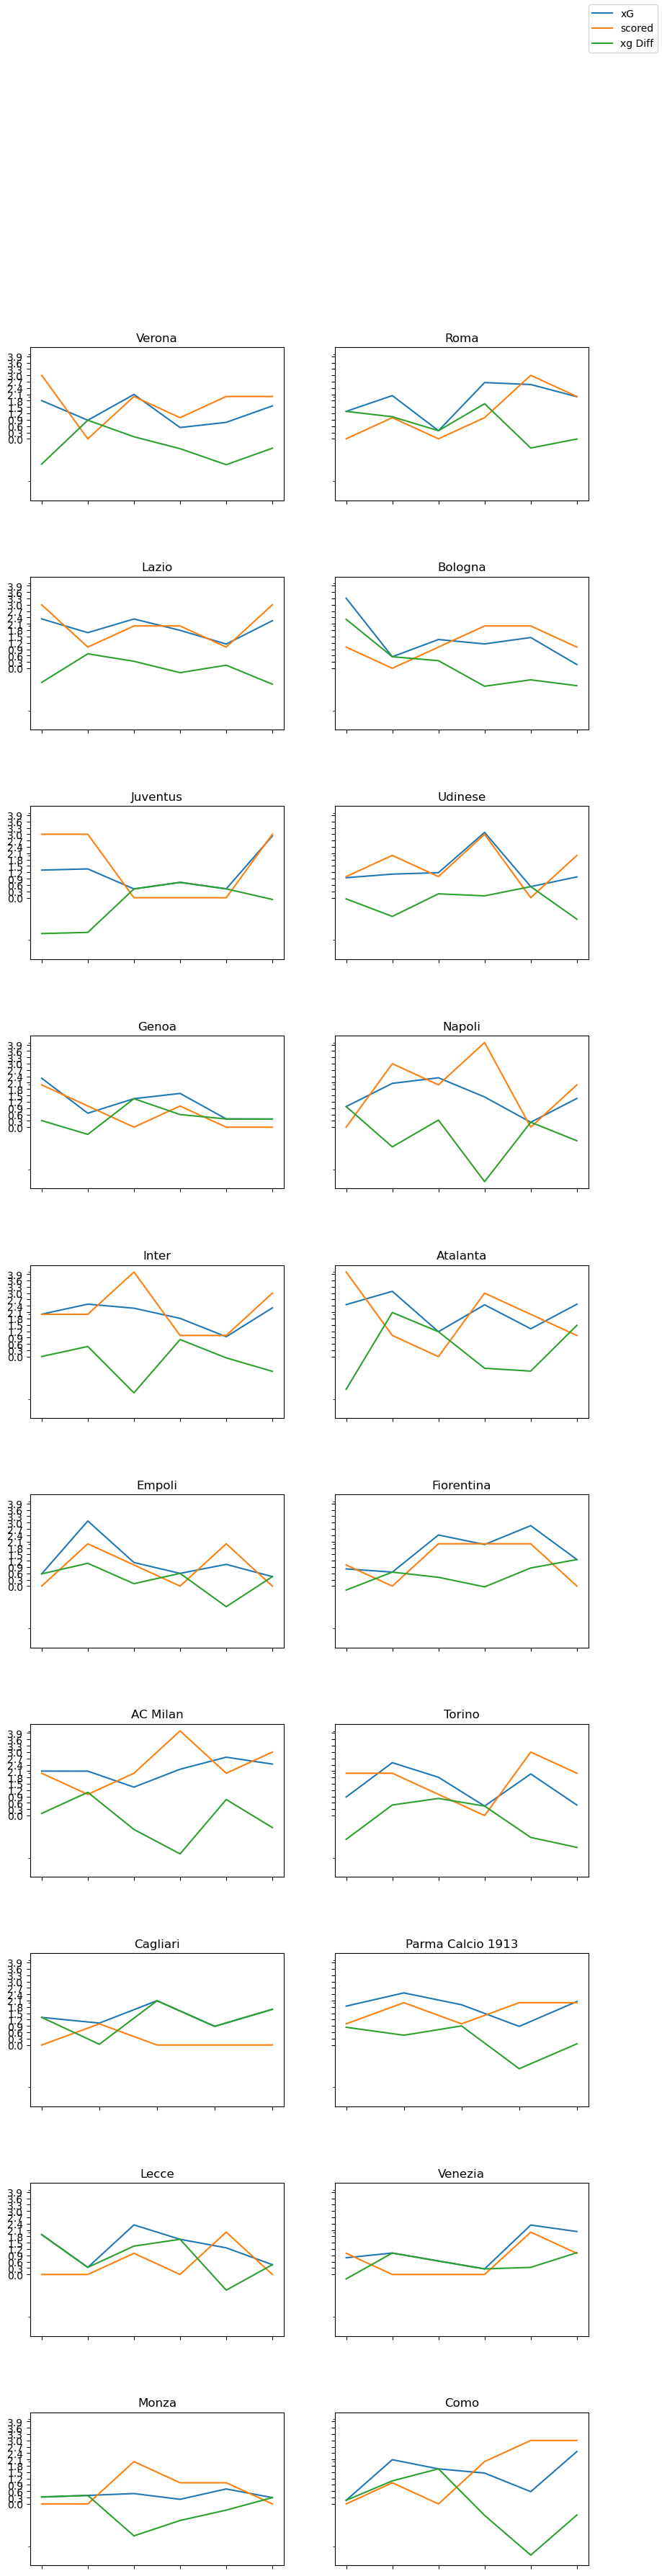

In [10]:
fig, axs = plt.subplots(len(unique_teams) // 2, 2, figsize=(10, 40), sharey=True)

plt.setp(
    axs,
    xticks=np.arange(1, max(df_teams["gameweek"].to_list()) + 1, 1),
    yticks=np.arange(0, max([*df_teams["xG"].to_list(), *df_teams["scored"].to_list()]), 0.3),
    xticklabels=[],
)


plt.subplots_adjust(hspace=0.5, wspace=0.2)

for i, team in enumerate(unique_teams["team_title"]):
    df_teams[df_teams["team_title"] == team].plot(
        x="gameweek", y=["xG", "scored", "xG_diff"], ax=axs[i // 2, i % 2]
    )
    ax = axs[i // 2, i % 2]
    ax.set_title(f"{team}")
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.legend_ = None

fig.legend(["xG", "scored", "xg Diff"], loc="upper right")

plt.show()